In [1]:
#imports
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# read csv file from data folder. Dataset obtained from https://min-api.cryptocompare.com/data/all/coinlist
file_path = os.path.join('.','data','crypto_data.csv')
df = pd.read_csv(file_path)
print(f'Shape after import {df.shape}')
#Discard cryptocurrencies that are not being traded.
df = df[df['IsTrading'] == True]
df = df.drop(columns=['IsTrading'])
print(f'Shape after filtering by IsTrading and dropping the column {df.shape}')
#Remove Rows that have at least one null value
df = df.dropna()
print(f'Shape after dropna {df.shape}')
#Filter for currencies that habe been mined
df['TotalCoinSupply'] = pd.to_numeric(df['TotalCoinSupply'])
df = df[df['TotalCoinSupply'] > 0]
print(f'Shape after filtering for mined {df.shape}')
#delete the CoinName column
coin_names = df['CoinName']
df = df.drop(columns=['Unnamed: 0', 'CoinName'])
#convert the two non numeric categories to numeric using get dummies, which should increase the features by the number of unique elemnents in each of the two converted colums
print(f'Shape after dropping columns{df.shape}')
alg_elements= len(df['Algorithm'].unique())
proof_elements = len(df['ProofType'].unique())
print(f'number of unique elements in Algorithm {alg_elements}')
print(f'number of unique elements in ProofType {proof_elements}')
df = pd.get_dummies(df)
print(f'Shape after getting dummies{df.shape}')
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
print(f'Shape after scaling{scaled_data.shape}')

Shape after import (1252, 7)
Shape after filtering by IsTrading and dropping the column (1144, 6)
Shape after dropna (685, 6)
Shape after filtering for mined (637, 6)
Shape after dropping columns(637, 4)
number of unique elements in Algorithm 78
number of unique elements in ProofType 25
Shape after getting dummies(637, 105)
Shape after scaling(637, 105)


In [3]:
#apply PCA to fit from 105 dimensions to the number of dimensions that preserves 90% of the explained variance
pca = PCA(n_components=.9)
pca_data = pca.fit_transform(scaled_data)
print(f'Shape after PCA {pca_data.shape}')
pca.explained_variance_ratio_

Shape after PCA (637, 80)


array([0.02152743, 0.02009212, 0.01913484, 0.01907757, 0.01907757,
       0.01907757, 0.01907757, 0.01907757, 0.01904019, 0.01699986,
       0.01628465, 0.0152066 , 0.01509449, 0.01489954, 0.01450315,
       0.01330357, 0.01188322, 0.01184387, 0.01126097, 0.01102736,
       0.01032707, 0.00980719, 0.00976109, 0.00971429, 0.0096818 ,
       0.00966213, 0.00964211, 0.00960745, 0.00959743, 0.00958471,
       0.00958399, 0.00958399, 0.00958333, 0.00957795, 0.00957446,
       0.00956887, 0.00956887, 0.00956887, 0.00956887, 0.00956332,
       0.00956018, 0.00955826, 0.00955726, 0.00955386, 0.00955381,
       0.00955305, 0.00955246, 0.00955039, 0.00954555, 0.00953878,
       0.00953878, 0.00953878, 0.00953878, 0.00953878, 0.00953878,
       0.00953878, 0.00953878, 0.00953878, 0.00953878, 0.00953878,
       0.00953878, 0.00953878, 0.00953878, 0.00953878, 0.00953878,
       0.00953878, 0.00953878, 0.00953878, 0.00953878, 0.00953878,
       0.00953878, 0.00953878, 0.00953878, 0.00953878, 0.00953

Shape after tsne (637, 2)
A scatter plot of the two feautures


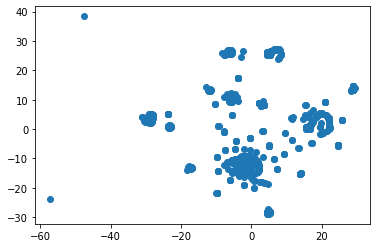

In [4]:
#apply t-SNE to the principal components in order to further reduce the features
tsne = TSNE(learning_rate=35)
tsne_data = tsne.fit_transform(pca_data)
print(f'Shape after tsne {tsne_data.shape}')
print(f'A scatter plot of the two feautures')
x = tsne_data[:,0]
y = tsne_data[:,1]
plt.scatter(x, y)
plt.show()

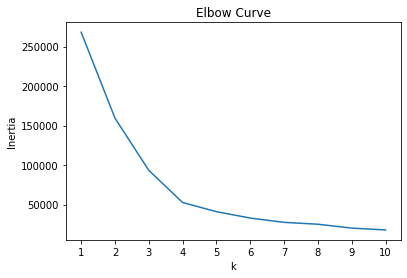

In [5]:
#Cluster Analysis with k means
#determine inertia for k 1 through 10, create elbow plot.
x =[]
y =[]
for k in range(1,11):
    model = KMeans(n_clusters=k)
    model.fit(tsne_data)
    x.append(k)
    y.append(model.inertia_)
    
plt.plot(x, y)
plt.xticks(list(range(1,11)))
plt.title('Elbow Curve')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

# It appears that the cryptocurrencies can be clustered into 4 clusters, as visualized below

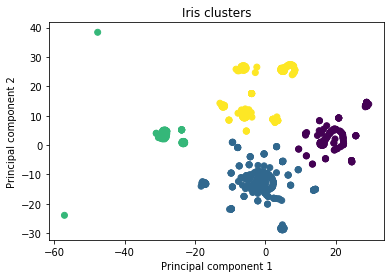

In [6]:
#It appears that the elbow is at 4. The best value of k is at 4, so we will predict cluster using k = 4
model = KMeans(n_clusters=4)
model.fit(tsne_data)
predictions = model.predict(tsne_data)
x = tsne_data[:,0]
y = tsne_data[:,1]
plt.scatter(x,y,c=predictions)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Iris clusters')
plt.show()